<h2> DATA COLLECTION <h2>

In [50]:
import pandas as pd 
import numpy as np
import stats
from pyclustering.cluster.silhouette import silhouette_ksearch

df = pd.read_csv('/Users/silvia.denti/Desktop/E-Health_Project/dataset_project_eHealth20242025.csv')
df.head()

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              160 non-null    int64  
 1   gender           158 non-null    float64
 2   education        160 non-null    int64  
 3   marital          159 non-null    float64
 4   income           159 non-null    float64
 5   phq_1            159 non-null    float64
 6   phq_2            160 non-null    int64  
 7   phq_3            160 non-null    int64  
 8   phq_4            160 non-null    int64  
 9   phq_5            160 non-null    int64  
 10  phq_6            158 non-null    float64
 11  phq_7            160 non-null    int64  
 12  phq_8            160 non-null    int64  
 13  phq_9            159 non-null    float64
 14  gad_1            160 non-null    int64  
 15  gad_2            160 non-null    int64  
 16  gad_3            160 non-null    int64  
 17  gad_4           

In [52]:
df.shape[0] # number of rows

160

In [53]:
df.shape[1] # number of columns

93

Initially, the dataset has 160 rows and 93 columns.

<h2> DATA CLEANING <h2>

<h3> Processing rows <h3>

First, I want to remove duplicate rows

In [54]:
#Duplicates control
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Mostra le righe duplicate (se esistono)
if len(duplicate_rows) > 0:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 10
Duplicate rows:
     age  gender  education  marital   income  phq_1  phq_2  phq_3  phq_4  \
150   31     0.0          8      0.0  34000.0    0.0      2      1      2   
151   70     3.0         13      4.0  22000.0    0.0      3      1      3   
152   52     1.0         13      1.0  44000.0    1.0      0      0      1   
153   37     1.0         22      1.0  65000.0    0.0      0      0      0   
154   36     1.0         18      1.0  63000.0    0.0      1      0      1   
155   80     2.0         18      3.0  18000.0    1.0      2      1      3   
156   19     2.0          8      0.0  30000.0    2.0      0      0      0   
157   26     3.0         18      0.0  39000.0    2.0      2      3      3   
158   46     1.0         22      1.0  57000.0    0.0      0      1      0   
159   46     0.0         25      1.0  61000.0    0.0      0      0      0   

     phq_5  ...  ssba_drug_3  ssba_drug_4  ssba_alcohol_1  ssba_alcohol_2  \
150      3  ...            3  

In [55]:
# Remove duplicates
df= df.drop_duplicates()

# Verifica il numero di righe rimaste
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 150


I want to cancel the rows that have null values in the columns important for me.

I decide to create a new dataset called df_new.

In [56]:
df_new = df.copy()

I cancel the rows that have at least one null value (NaN) in the columns from phq_1 to phq_9 because the final score of the questionnaire would be uncompleted.

In [57]:
df_new = df_new.dropna(subset=[f'phq_{i}' for i in range(1, 10)])

df_new

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,51,0.0,18,1.0,68000.0,0.0,0,1,0,0,...,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0
146,32,1.0,13,0.0,38000.0,3.0,2,0,3,1,...,0,3,0,1,0,0.0,0.0,0.0,0.0,0.0
147,46,2.0,22,0.0,56000.0,0.0,1,0,1,0,...,2,0,0,1,1,0.0,0.0,0.0,0.0,NaN
148,45,2.0,18,1.0,59000.0,1.0,1,0,0,0,...,1,0,1,0,0,0.0,0.0,2.0,0.0,0.0


I cancel the rows that have at least one null value in the columns from gad_1_1 to gad_7
because the final score of the questionnaire would be uncompleted.

In [58]:
df_new = df_new.dropna(subset=[f'gad_{i}' for i in range(1, 8)])

df_new

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,51,0.0,18,1.0,68000.0,0.0,0,1,0,0,...,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0
146,32,1.0,13,0.0,38000.0,3.0,2,0,3,1,...,0,3,0,1,0,0.0,0.0,0.0,0.0,0.0
147,46,2.0,22,0.0,56000.0,0.0,1,0,1,0,...,2,0,0,1,1,0.0,0.0,0.0,0.0,NaN
148,45,2.0,18,1.0,59000.0,1.0,1,0,0,0,...,1,0,1,0,0,0.0,0.0,2.0,0.0,0.0


I cancel the rows that have at least one null value in the columns from all ssba_1 to ssba_4 because the final score of the questionnaire would be uncompleted

In [59]:
df_new = df_new.dropna(subset=[f'ssba_internet_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_drug_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_alcohol_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_gambling_{i}' for i in range(1, 5)])
df_new

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,52,1.0,13,1.0,44000.0,1.0,0,0,1,1,...,0,1,1,0,0,2.0,1.0,0.0,0.0,0.0
145,51,0.0,18,1.0,68000.0,0.0,0,1,0,0,...,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0
146,32,1.0,13,0.0,38000.0,3.0,2,0,3,1,...,0,3,0,1,0,0.0,0.0,0.0,0.0,0.0
148,45,2.0,18,1.0,59000.0,1.0,1,0,0,0,...,1,0,1,0,0,0.0,0.0,2.0,0.0,0.0


<h4> I have obtained a new dataset (df_new) with 137 rows and 93 columns. <h4>

<h3> Processing columns <h3>

Concerning depression, I want to discover the total score of the questionnaire. 
So, I want to sum up, for each Persona, the score of the columns from phq_1 to phq_9, and later I cancel the columns from phq_1 to phq_9.

In [60]:
df_new['phq_tot'] = df_new.loc[:, 'phq_1':'phq_9'].sum(axis=1)

df_new = df_new.drop(columns=[f'phq_{i}' for i in range(1, 10)])

df_new.head()

,age,gender,education,marital,income,gad_1,gad_2,gad_3,gad_4,gad_5,...,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot
0,18,2.0,13,0.0,38000.0,0,0,3,1,3.0,...,1,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0
1,62,1.0,5,1.0,22000.0,0,0,0,0,0.0,...,0,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0
2,31,1.0,13,0.0,33000.0,3,1,3,3,3.0,...,4,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0
3,76,3.0,8,4.0,10000.0,0,0,0,0,1.0,...,2,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0
4,19,2.0,8,0.0,30000.0,3,3,0,3,3.0,...,0,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0


Concerning anxiety, I want to discover the total score of the questionnaire. 
So, I want to sum up, for each Persona, the score of the columns from gad_1 to gad_7, and later I cancel the columns from gad_1 to gad_7.

In [61]:
df_new['gad_tot'] = df_new.loc[:, 'gad_1':'gad_7'].sum(axis=1)

df_new = df_new.drop(columns=[f'gad_{i}' for i in range(1, 8)])

df_new.head()

,age,gender,education,marital,income,asrs_1,asrs_2,asrs_3,asrs_4,asrs_5,...,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot
0,18,2.0,13,0.0,38000.0,1,1,2.0,0,1,...,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0
1,62,1.0,5,1.0,22000.0,3,3,0.0,1,1,...,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0
2,31,1.0,13,0.0,33000.0,0,0,2.0,0,2,...,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0
3,76,3.0,8,4.0,10000.0,2,2,1.0,2,0,...,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0
4,19,2.0,8,0.0,30000.0,0,2,0.0,0,1,...,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0


I don't want to concentrate about people with ADHD or ASD, so I decide to remove the columns from asrs_1 to asrs_6 and columns from asq_1 to asq_50.

In [62]:
df_new = df_new.drop(columns=[f'asrs_{i}' for i in range(1, 7)])
df_new = df_new.drop(columns=[f'asq_{i}' for i in range(1, 51)])

df_new.head()

,age,gender,education,marital,income,ssba_internet_1,ssba_internet_2,ssba_internet_3,ssba_internet_4,ssba_drug_1,...,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot
0,18,2.0,13,0.0,38000.0,4,3,4,4.0,0.0,...,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0
1,62,1.0,5,1.0,22000.0,1,2,0,0.0,0.0,...,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0
2,31,1.0,13,0.0,33000.0,3,0,2,0.0,4.0,...,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0
3,76,3.0,8,4.0,10000.0,0,1,0,0.0,0.0,...,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0
4,19,2.0,8,0.0,30000.0,3,4,4,4.0,4.0,...,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0


Now, I want to concentrate on addictions:

In [63]:
# I sum up the columns of internet addiction
df_new['ssba_internet_tot'] = df_new.loc[:, 'ssba_internet_1':'ssba_internet_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_internet_{i}' for i in range(1, 5)])

df_new.head()

,age,gender,education,marital,income,ssba_drug_1,ssba_drug_2,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot,ssba_internet_tot
0,18,2.0,13,0.0,38000.0,0.0,2,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0,15.0
1,62,1.0,5,1.0,22000.0,0.0,0,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0,3.0
2,31,1.0,13,0.0,33000.0,4.0,3,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0,5.0
3,76,3.0,8,4.0,10000.0,0.0,0,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0,1.0
4,19,2.0,8,0.0,30000.0,4.0,0,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0,15.0


In [64]:
# I sum up the columns of drug addiction
df_new['ssba_drug_tot'] = df_new.loc[:, 'ssba_drug_1':'ssba_drug_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_drug_{i}' for i in range(1, 5)])

In [65]:
# I sum up the columns of alcohol addiction
df_new['ssba_alcohol_tot'] = df_new.loc[:, 'ssba_alcohol_1':'ssba_alcohol_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_alcohol_{i}' for i in range(1, 5)])

In [66]:
# I sum up the columns of gambling addiction
df_new['ssba_gambling_tot'] = df_new.loc[:, 'ssba_gambling_1':'ssba_gambling_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_gambling_{i}' for i in range(1, 5)])

df_new.head()

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0


In [67]:
df_new

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
144,52,1.0,13,1.0,44000.0,4.0,0.0,0.0,1.0,3.0,1.0
145,51,0.0,18,1.0,68000.0,1.0,4.0,0.0,0.0,1.0,1.0
146,32,1.0,13,0.0,38000.0,16.0,12.0,13.0,9.0,1.0,0.0
148,45,2.0,18,1.0,59000.0,4.0,1.0,3.0,3.0,1.0,2.0


<h4> I have obtained a new dataset (df_new) with 137 rows and 11 columns. <h4>

In [68]:
df_new = df_new.dropna()
df_new

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
144,52,1.0,13,1.0,44000.0,4.0,0.0,0.0,1.0,3.0,1.0
145,51,0.0,18,1.0,68000.0,1.0,4.0,0.0,0.0,1.0,1.0
146,32,1.0,13,0.0,38000.0,16.0,12.0,13.0,9.0,1.0,0.0
148,45,2.0,18,1.0,59000.0,4.0,1.0,3.0,3.0,1.0,2.0


<h4> In this way we have eliminated all the rows with NaN and obtained a new dataset (df_new) with 133 rows and 11 columns. <h4>

<h2>EXPLORATORY DATA ANALYSIS<h2>

<h3> Univariate Data Analysis <h3>

<h3>What Is the Shapiro-Wilk Test?</h3>

The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.

It’s an easy-to-use statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation, but in Python, we see that a sample size larger than 5,000 will give us an approximate calculation for the p-value.

https://builtin.com/data-science/shapiro-wilk-testscipy.stats.

shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)
Perform the Shapiro-Wilk test for normality.
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

Parameters: 

x -> array_like: array of sample data. Must contain at least three observations.

axis -> int or None, default: None. If an int, the axis of the input along which to compute the statistic. The statistic of each axis-slice (e.g. row) of the input will appear in a corresponding element of the output. If None, the input will be raveled before computing the statistic.

nan_policy -> {‘propagate’, ‘omit’, ‘raise’}. Defines how to handle input NaNs. (propagate: if a NaN is present in the axis slice (e.g. row) along which the statistic is computed, the corresponding entry of the output will be NaN; omit: NaNs will be omitted when performing the calculation. If insufficient data remains in the axis slice along which the statistic is computed, the corresponding entry of the output will be NaN; raise: if a NaN is present, a ValueError will be raised).

keepdims -> bool, default: False. If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array.

Returns:

statistic (float) -> The test statistic.

p-value (float) -> The p-value for the hypothesis test.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [69]:
df_new.describe()

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,46.984962,1.413534,13.338346,1.593985,35464.654135,10.774436,6.804511,4.548872,4.496241,4.120301,4.330827
std,18.289749,1.122280,6.020026,1.552308,17322.870686,6.719055,7.049026,4.925915,4.953762,4.272955,4.590375
min,18.000000,0.000000,5.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,8.000000,1.000000,21000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,45.000000,1.000000,13.000000,1.000000,33000.000000,13.000000,3.000000,3.000000,2.000000,3.000000,2.000000
75%,62.000000,2.000000,18.000000,2.000000,51000.000000,16.000000,14.000000,8.000000,8.000000,5.000000,6.000000
max,80.000000,3.000000,25.000000,5.000000,69000.000000,20.000000,21.000000,16.000000,16.000000,16.000000,16.000000


I want to see the age distribution:

Statistiche: 0.9485578409190598
P-value: 7.247914528636637e-05
Data do not follow a normal distribution.


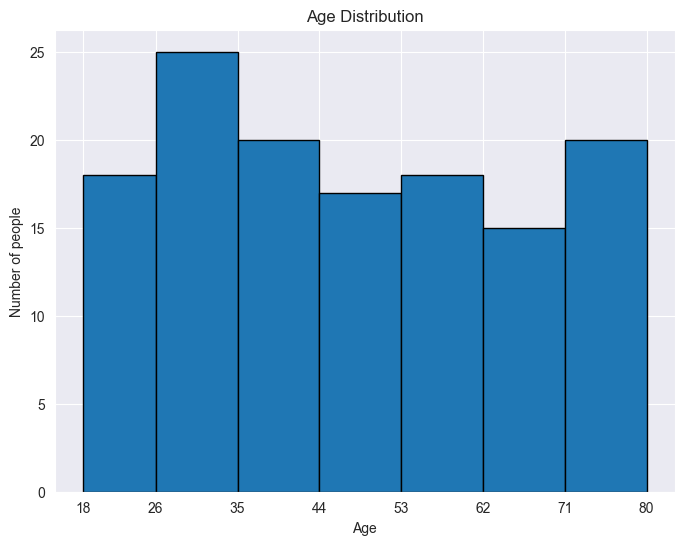

In [70]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, mannwhitneyu

#First, I will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'age'
stat, p = shapiro(df_new['age'])

# Risultati
print(f"Statistiche: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")
    
# I want to create equal intervals between 18 and 80 (min and max)
bins = np.linspace(18, 80, 8).astype(int)  # I have decided to create 7 intervals

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df_new['age'], bins=bins, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')

plt.xticks(bins) 

plt.grid(True)

plt.show()

In the dataset, the majority of people are between 26 and 35 years old, followed by those aged between 35 and 44, and between 71 and 80 years old.

Gender:

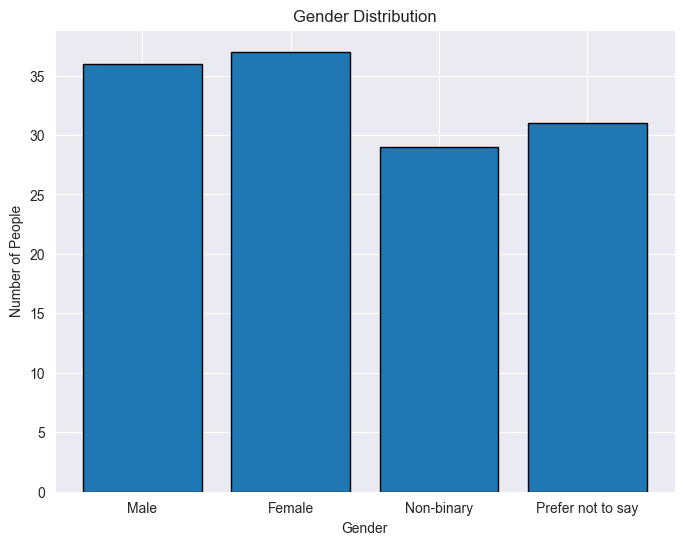

In [71]:
labels = ['Male', 'Female', 'Non-binary', 'Prefer not to say']

gender_counts = df_new['gender'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, gender_counts, edgecolor='black')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of People')

plt.grid(True, axis='y')

plt.show()

In the chart, a slight majority of females can be observed, followed by males and people who prefer not to specify their gender.

Education:

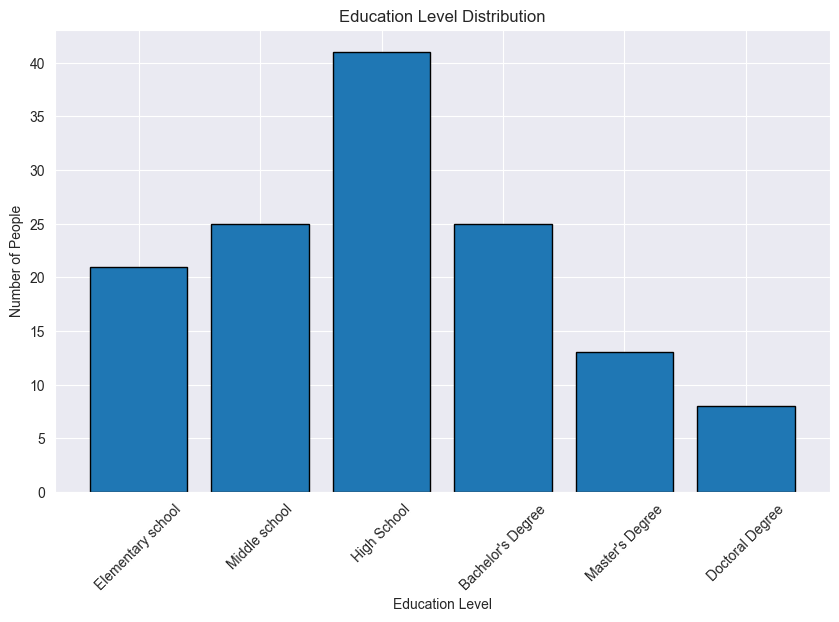

In [72]:
labels = ['Elementary school', 'Middle school', 'High School', 
          "Bachelor's Degree", "Master's Degree", 'Doctoral Degree']

education_counts = df_new['education'].value_counts().reindex([5, 8, 13, 18, 22, 25], fill_value=0)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, education_counts, edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of People')

plt.xticks(rotation=45)

plt.grid(True, axis='y')

plt.show()

In the chart, a clear predominance of people with a high school diploma can be seen, followed by those with a bachelor's degree and those who stopped at middle school.

Marital Status:

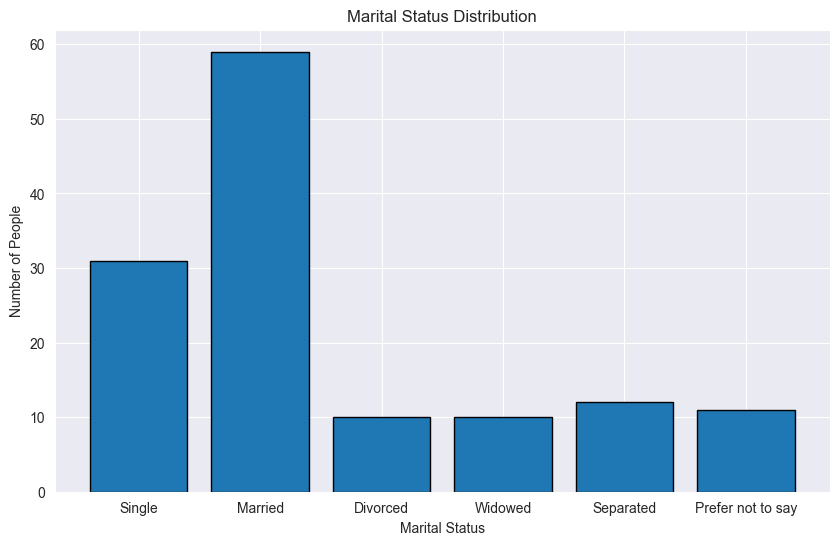

In [73]:
labels = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say']

marital_counts = df_new['marital'].value_counts().reindex([0, 1, 2, 3, 4, 5], fill_value=0)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, marital_counts, edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of People')

plt.grid(True, axis='y')

plt.show()

In the chart, a very clear predominance of married people can be observed, followed by a minority of single individuals.

Income:

Statistiche: 0.9324674441691482
P-value: 5.1059452390722544e-06
Data do not follow a normal distribution.


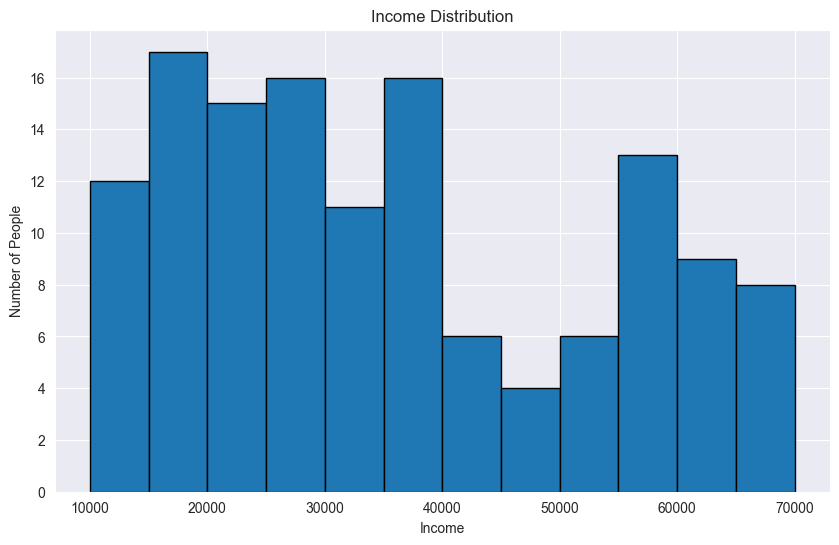

In [74]:
income_min = df_new['income'].min()
income_max = df_new['income'].max()

df_new = df_new.dropna(subset=['income'])

#First, I will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'income'
stat, p = shapiro(df_new['income'])

# Risultati
print(f"Statistiche: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")
    
bins = np.arange(income_min, income_max + 5000, 5000)

# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(df_new['income'], bins=bins, edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of People')

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.grid(True)

plt.show()

Severity of the depression:

Statistiche: 0.880936331692608
P-value: 6.3501627251294264e-09
Data do not follow a normal distribution.


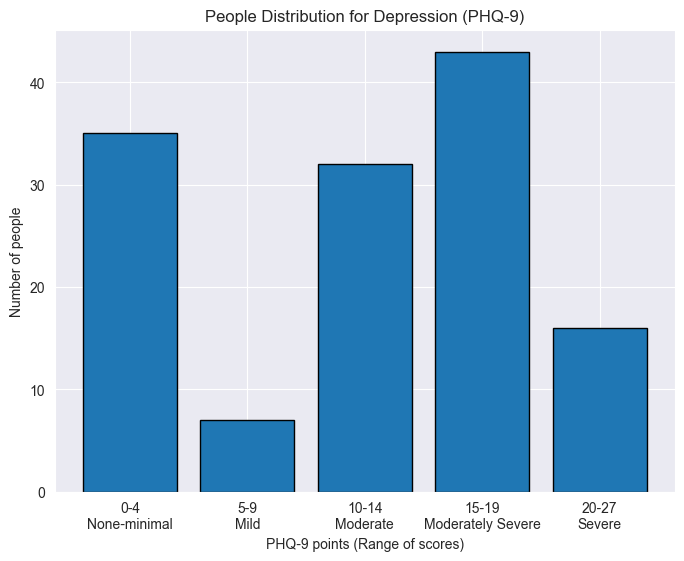

In [75]:
import numpy as np

#First, i will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'phq_tot'
stat, p = shapiro(df_new['phq_tot'])

# Risultati
print(f"Statistiche: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")
    

# I define the bin edges and corresponding labels for the intervals (PHQ-9 for depression)
bins = [0, 4, 9, 14, 19, 27]
labels = ['0-4\nNone-minimal', '5-9\nMild', '10-14\nModerate', '15-19\nModerately Severe', '20-27\nSevere']

# I count how many people fall into each interval (PHQ-9 scores)
counts, _ = np.histogram(df_new['phq_tot'], bins=bins)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, edgecolor='black')

plt.title('People Distribution for Depression (PHQ-9)')
plt.xlabel('PHQ-9 points (Range of scores)')
plt.ylabel('Number of people')

plt.grid(True, axis='y')

plt.show()

The chart shows the distribution of people based on their PHQ-9 depression score, which measure the severity of depression. The PHQ-9 scores are divided into five categories:
- 0-4 (None-minimal): the second largest group falls within this category, with around 40 people showing little to no signs of depression;
- 5-9 (Mild): a small group, representing the fewest number of people, falls within the mild depression category, with fewer than 10 individuals;
- 10-14 (Moderate): a large number of individuals, around 35 people, have depression symptoms classified as moderate;
- 15-19 (Moderately Severe): the largest group, with over 45 individuals, falls into the moderately severe category, indicating a significant number of people experiencing serious depressive symptoms;
- 20-27 (Severe): a small group, slightly above 15 people, falls into the severe depression range.


Severity of the anxiety:

Statistiche: 0.7933863902771695
P-value: 2.078491685047296e-12
Data do not follow a normal distribution.


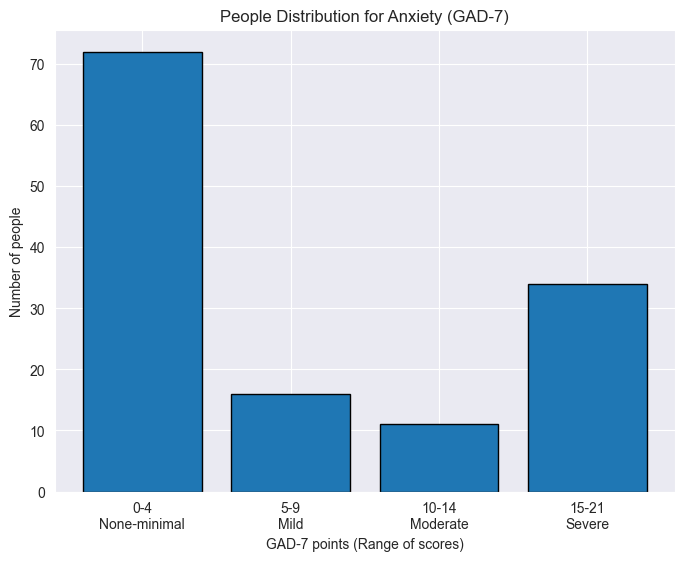

In [76]:
#First, i will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'gad_tot'
stat, p = shapiro(df_new['gad_tot'])

# Risultati
print(f"Statistiche: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Data do not follow a normal distribution.")
else:
    print("Data follow a normal distribution.")
    
#
# I define the bin edges and corresponding labels for the intervals
bins = [0, 4, 9, 14, 21]
labels = ['0-4\nNone-minimal', '5-9\nMild', '10-14\nModerate', '15-21\nSevere']

# I count how many people fall into each interval (GAD-7)
counts, _ = np.histogram(df_new['gad_tot'], bins=bins)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, edgecolor='black')

plt.title('People Distribution for Anxiety (GAD-7)')
plt.xlabel('GAD-7 points (Range of scores)')
plt.ylabel('Number of people')

plt.grid(True, axis='y')

plt.show()

This chart illustrates the distribution of people based on their GAD-7 anxiety score, which measure the severity of generalized anxiety disorder (GAD). The scores are divided into five categories, reflecting different levels of anxiety:

- 0-4 (None-minimal): this category represents the  largest group, with almost 80 people exhibiting little to no anxiety symptoms;
- 5-9 (Mild): the number of people with mild anxiety is much smaller, 
- 10-14 (Moderate): there is a moderate group of people, numbering around 15, showing notable anxiety symptoms but not reaching the severe level;
- 15-21 (Severe): the largest group falls into the "Severe" category, with more than 60 people displaying severe anxiety symptoms. This suggests that a significant portion of the dataset is experiencing high levels of anxiety according to the GAD-7 measure.

Severity of all the addictions:

Statistiche internet addiction: 0.8060571067125086
P-value internet addiction: 5.638992600275016e-12
Data (internet addiction) do not follow a normal distribution.

Statistiche drug addiction: 0.7975362122108157
P-value drug addiction: 2.8684968076371024e-12
Data (drug addiction) do not follow a normal distribution.

Statistiche alcohol addiction: 0.8198032197252937
P-value alcohol addiction: 1.753217586792625e-11
Data (alcohol addiction) do not follow a normal distribution.

Statistiche gambling addiction: 0.8105234221559361
P-value gambling addiction: 8.102002448622633e-12
Data (gambling addiction) do not follow a normal distribution.



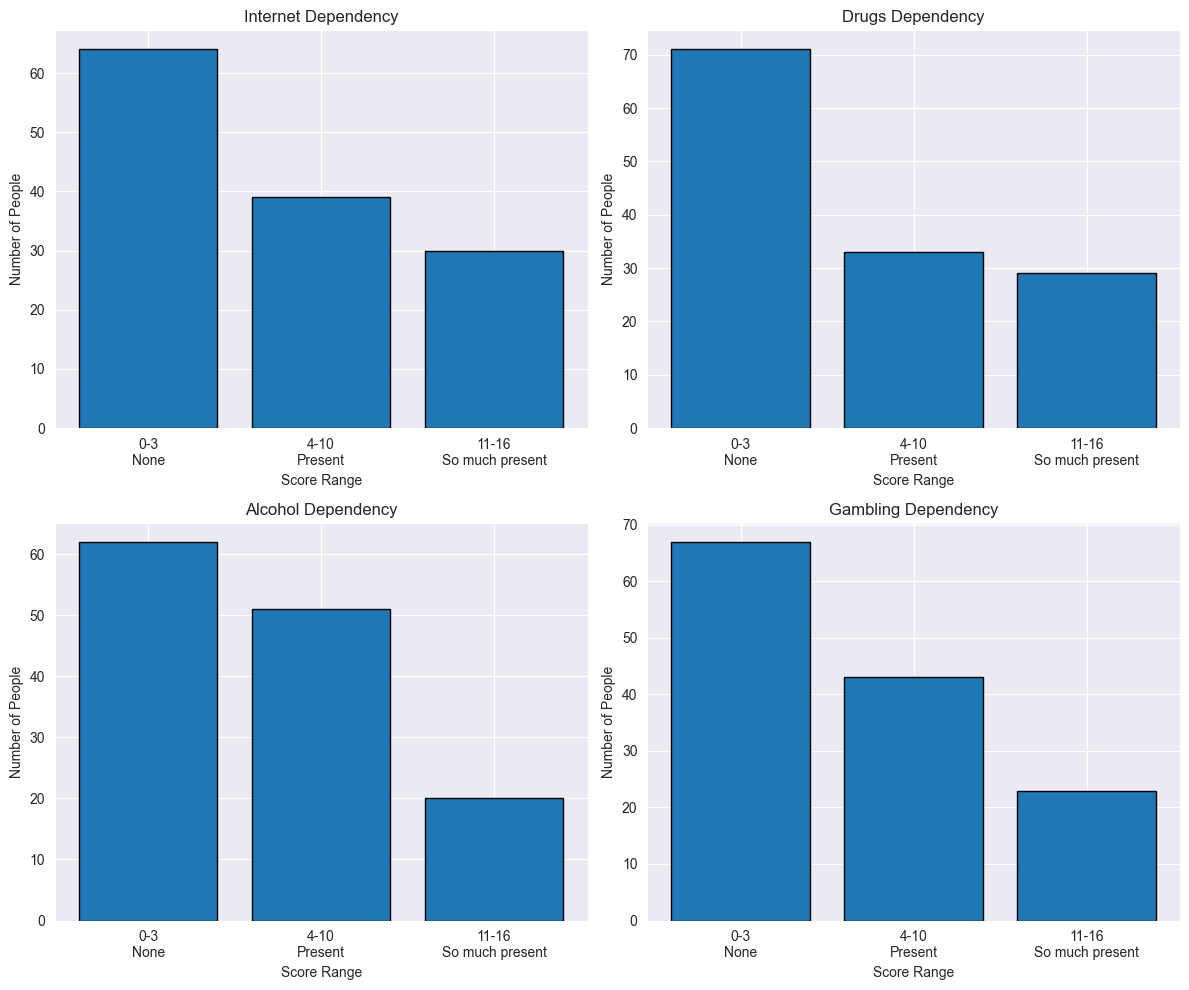

In [77]:
import matplotlib.pyplot as plt
import numpy as np

#First, i will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'ssba_internet_tot'
stat, p = shapiro(df_new['ssba_internet_tot'])

# Risultati
print(f"Statistiche internet addiction: {stat}")
print(f"P-value internet addiction: {p}")

if p < 0.05:
    print("Data (internet addiction) do not follow a normal distribution.\n")
else:
    print("Data (internet addiction) follow a normal distribution.\n")
   
      
#First, i will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'ssba_drug_tot'
stat, p = shapiro(df_new['ssba_drug_tot'])

# Risultati
print(f"Statistiche drug addiction: {stat}")
print(f"P-value drug addiction: {p}")

if p < 0.05:
    print("Data (drug addiction) do not follow a normal distribution.\n")
else:
    print("Data (drug addiction) follow a normal distribution.\n")
    
     
#First, i will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'ssba_alcohol_tot'
stat, p = shapiro(df_new['ssba_alcohol_tot'])

# results
print(f"Statistiche alcohol addiction: {stat}")
print(f"P-value alcohol addiction: {p}")

if p < 0.05:
    print("Data (alcohol addiction) do not follow a normal distribution.\n")
else:
    print("Data (alcohol addiction) follow a normal distribution.\n")
    
#First, i will check if the data distribution is normal
#Shapiro-Wilk test on the variable 'ssba_gambling_tot'
stat, p = shapiro(df_new['ssba_gambling_tot'])

# Risultati
print(f"Statistiche gambling addiction: {stat}")
print(f"P-value gambling addiction: {p}")

if p < 0.05:
    print("Data (gambling addiction) do not follow a normal distribution.\n")
else:
    print("Data (gambling addiction) follow a normal distribution.\n")
    
    

# I define the bin edges and labels for the addictions
bins = [0, 3, 10, 16]
labels = ['0-3\nNone', '4-10\nPresent', '11-16\nSo much present']

# List of column names for each addiction type and their corresponding titles
addictions = {
    'Internet': 'ssba_internet_tot',
    'Drugs': 'ssba_drug_tot',
    'Alcohol': 'ssba_alcohol_tot',
    'Gambling': 'ssba_gambling_tot'
}

# I create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots

# I iterate through each addiction in order to create a separate bar chart
for ax, (addiction_name, column_name) in zip(axs.flatten(), addictions.items()):
    # I count how many people fall into each interval for the specific addiction
    counts, _ = np.histogram(df_new[column_name], bins=bins)
    
    # Bar chart for the current addiction
    ax.bar(labels, counts, edgecolor='black')
    
    ax.set_title(f'{addiction_name} Dependency')
    ax.set_xlabel('Score Range')
    ax.set_ylabel('Number of People')
    ax.grid(True, axis='y')

plt.tight_layout()

plt.show()

<h3> Bivariate Analysis <h3>

spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')

Calculate a Spearman correlation coefficient with associated p-value.

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations). For smaller sample sizes, consider a permutation test (see Examples section below).

Parameters:
a, b1D or 2D array_like, b is optional
One or two 1-D or 2-D arrays containing multiple variables and observations. When these are 1-D, each represents a vector of observations of a single variable. For the behavior in the 2-D case, see under axis, below. Both arrays need to have the same length in the axis dimension.
axisint or None, optional
If axis=0 (default), then each column represents a variable, with observations in the rows. If axis=1, the relationship is transposed: each row represents a variable, while the columns contain observations. If axis=None, then both arrays will be raveled.
nan_policy{‘propagate’, ‘raise’, ‘omit’}, optional
Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):
‘propagate’: returns nan
‘raise’: throws an error
‘omit’: performs the calculations ignoring nan values
alternative{‘two-sided’, ‘less’, ‘greater’}, optional
Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:
‘two-sided’: the correlation is nonzero
‘less’: the correlation is negative (less than zero)
‘greater’: the correlation is positive (greater than zero)
Added in version 1.7.0.

Returns:
resSignificanceResult
An object containing attributes:
statistic
float or ndarray (2-D square)
Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters). Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.
pvalue
float
The p-value for a hypothesis test whose null hypothesis is that two samples have no ordinal correlation. See alternative above for alternative hypotheses. pvalue has the same shape as statistic.




Now, I want to see how the other variables change with respect to the depression score of the questionnaire (phq_tot).


Age:

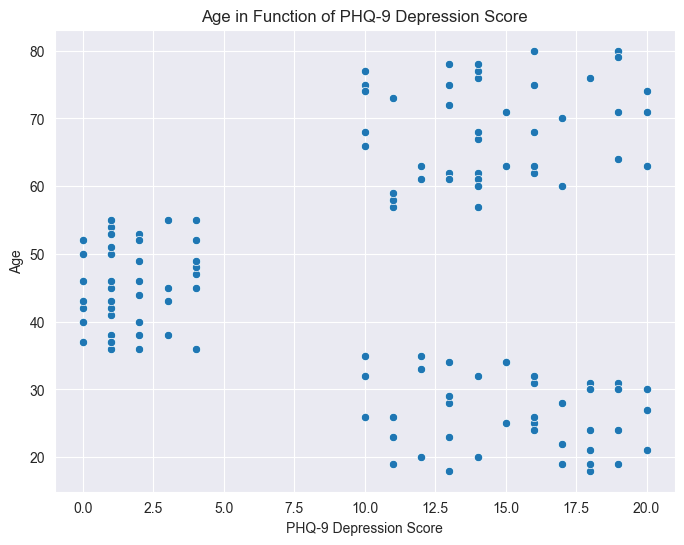

Spearman's coefficient: -0.062, p-value: 0.479


In [78]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Scatter plot to visualize the relationship between Age and PHQ-9 Depression Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['age'])
plt.title('Age in Function of PHQ-9 Depression Score')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('Age')
plt.grid(True)
plt.show()

#Since none of our variables follow a normal distrubution we use the spearman correlation
spearman_corr, spearman_p_value = spearmanr(df_new['phq_tot'], df_new['age'])
print(f"Spearman's coefficient: {spearman_corr:.3f}, p-value: {spearman_p_value:.3f}")

For the Spearman's coefficient, in this case, the value of -0.051 is very close to 0, suggesting that there is no significant relationship between the variables. Similarly, the p-value of 0.538 is much higher than 0.05, indicating that there is no evidence of a significant relationship between Age and PHQ-9 Depression Score.

- Young People (20-35): there are individuals with both mild and severe levels of depression.
- Adults (30-50): many participants seem to have lower depression scores (between 0 and 5). 
- Elderly (60 and above): PHQ-9 scores tend to be higher, which might indicate a trend toward more severe levels of depression among older individuals.

The Spearman's coefficient between depression (PHQ-9 score) and age is -0.051. This indicates a very weak negative monotonic relationship between these two variables, meaning that as one variable increases, the other tends to slightly decrease, but the effect is extremely small. The p-value is 0.538, which is much higher than the common significance level of 0.05. So, the correlation is not statistically significant.

Gender: 

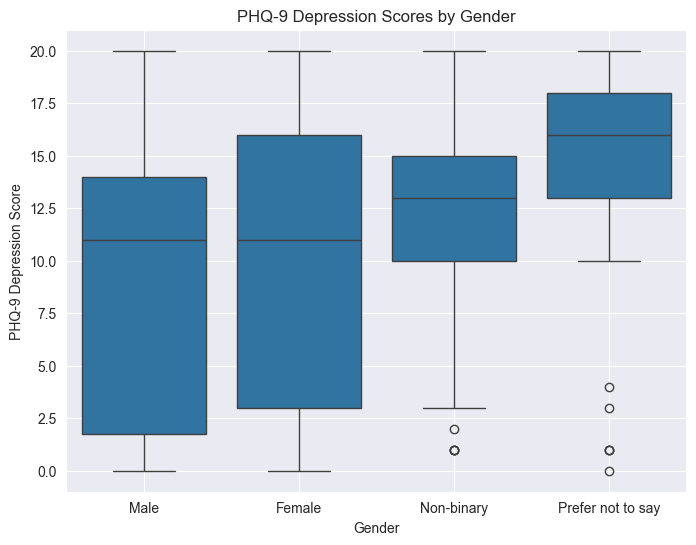

Kruskal-Wallis Test: H-statistic = 9.064, p-value = 2.845e-02
There is a statistically significant difference in PHQ-9 scores between gender groups.


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Box plot to compare depression scores with gender categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['gender'], y=df_new['phq_tot'])
plt.xticks([0, 1, 2, 3], ['Male', 'Female', 'Non-binary', 'Prefer not to say'])
plt.title('PHQ-9 Depression Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

# Filter groups with at least two valid values
# Ensuring only groups with sufficient data are included in the test
valid_groups = [gender for gender in df_new['gender'].unique()
                if df_new[df_new['gender'] == gender]['phq_tot'].dropna().shape[0] > 1]

# Prepare the data for valid groups
# Extracting PHQ-9 scores for valid groups
filtered_groups = [df_new[df_new['gender'] == gender]['phq_tot'].dropna() for gender in valid_groups]

# Perform the Kruskal-Wallis test on valid groups
# This non-parametric test compares the distribution of PHQ-9 scores across gender groups
if len(filtered_groups) > 1:
    stat, p_value = kruskal(*filtered_groups)  # Running the test
    print(f"Kruskal-Wallis Test: H-statistic = {stat:.3f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a statistically significant difference in PHQ-9 scores between gender groups.")
    else:
        print("No statistically significant difference in PHQ-9 scores between gender groups.")
else:
    print("Not enough valid groups for Kruskal-Wallis Test.")  # Inform if the test cannot be run

The p-value is below the threshold allowing us to reject the null hypothesis that there are no differences in depression scores among the groups. We conclude that at least one group differs significantly from the others.

Education:

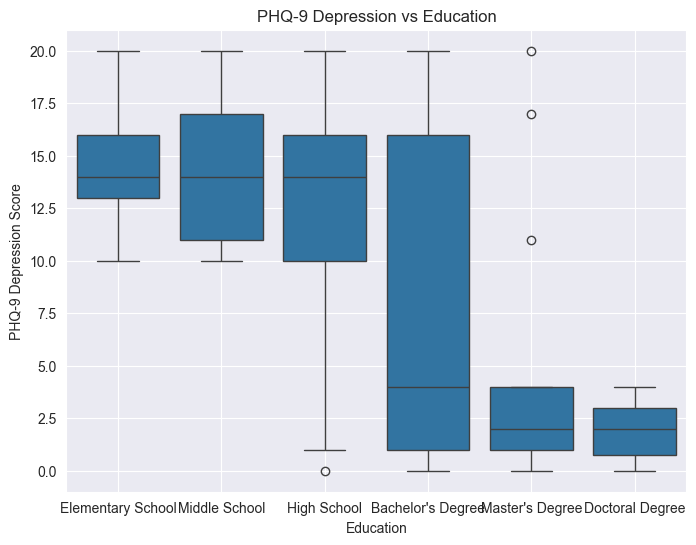

Kruskal-Wallis Test: H-statistic = 28.153, p-value = 3.397e-05
There is a statistically significant difference in PHQ-9 scores between education groups.


In [80]:
# Box plot to compare depression scores with education categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['education'], y=df_new['phq_tot'])

plt.xticks([0, 1, 2, 3, 4, 5], ['Elementary School', 'Middle School', 'High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'Doctoral Degree'])

plt.title('PHQ-9 Depression vs Education')
plt.xlabel('Education')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

# Filter groups with at least two valid values
# Ensuring only groups with sufficient data are included in the test
valid_groups = [education for education in df_new['education'].unique()
                if df_new[df_new['education'] == education]['phq_tot'].dropna().shape[0] > 1]

# Prepare the data for valid groups
# Extracting PHQ-9 scores for valid groups
filtered_groups = [df_new[df_new['education'] == education]['phq_tot'].dropna() for education in valid_groups]

# Perform the Kruskal-Wallis test on valid groups
# This non-parametric test compares the distribution of PHQ-9 scores across gender groups
if len(filtered_groups) > 1:
    stat, p_value = kruskal(*filtered_groups)  # Running the test
    print(f"Kruskal-Wallis Test: H-statistic = {stat:.3f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a statistically significant difference in PHQ-9 scores between education groups.")
    else:
        print("No statistically significant difference in PHQ-9 scores between education groups.")
else:
    print("Not enough valid groups for Kruskal-Wallis Test.")  # Inform if the test cannot be run

There is a statistically significant relationship between education level and depression scores. Individuals with higher education tend to report lower depression scores, while those with lower education levels report higher scores.

Marital status:

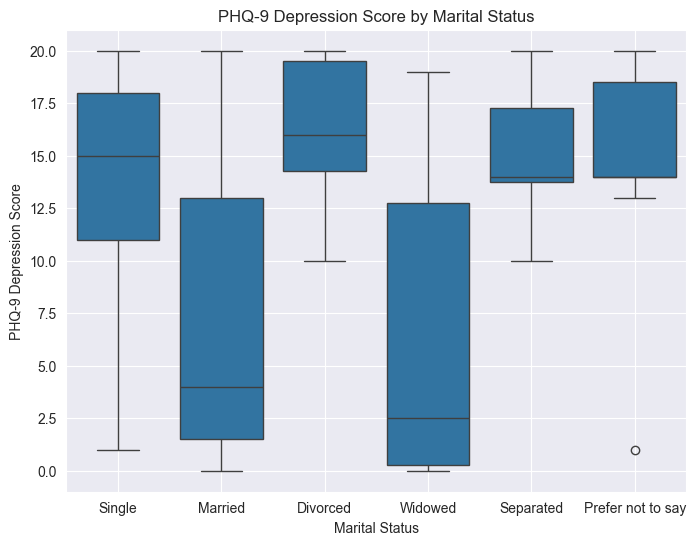

Kruskal-Wallis Test: H-statistic = 35.948, p-value = 9.727e-07
There is a statistically significant difference in PHQ-9 scores between education groups.


In [81]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['marital'], y=df_new['phq_tot'])

plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say'])

plt.title('PHQ-9 Depression Score by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

# Filter groups with at least two valid values
# Ensuring only groups with sufficient data are included in the test
valid_groups = [marital for marital in df_new['marital'].unique()
                if df_new[df_new['marital'] == marital]['phq_tot'].dropna().shape[0] > 1]

# Prepare the data for valid groups
# Extracting PHQ-9 scores for valid groups
filtered_groups = [df_new[df_new['marital'] == marital]['phq_tot'].dropna() for marital in valid_groups]

# Perform the Kruskal-Wallis test on valid groups
# This non-parametric test compares the distribution of PHQ-9 scores across gender groups
if len(filtered_groups) > 1:
    stat, p_value = kruskal(*filtered_groups)  # Running the test
    print(f"Kruskal-Wallis Test: H-statistic = {stat:.3f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a statistically significant difference in PHQ-9 scores between education groups.")
    else:
        print("No statistically significant difference in PHQ-9 scores between education groups.")
else:
    print("Not enough valid groups for Kruskal-Wallis Test.")

Divorced individuals have the highest depression scores, while married and widowed individuals show lower median depression scores. Single and separated individuals have moderate depression levels, with the married group having the lowest overall.
The p-value is very small, much smaller than the standard threshold of 0.05. So, there are significant differences in depression scores between the different marital status groups.

Income:

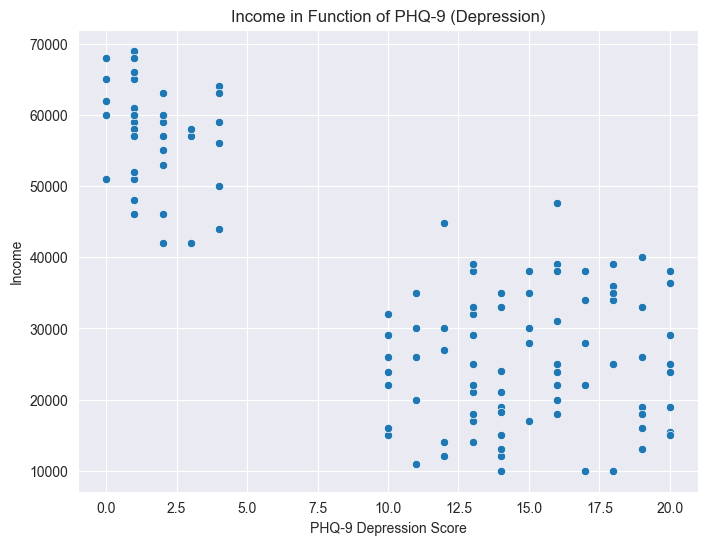

Spearman's coefficient: -0.598, p-value = 3.124e-14


In [82]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm  # Lilliefors test
import matplotlib.pyplot as plt
from decimal import Decimal

# Scatter plot to visualize the relationship between PHQ-9 Depression Score and Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['income'])
plt.title('Income in Function of PHQ-9 (Depression)')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('Income')
plt.grid(True)
plt.show()
# Since we've checked that our datat is not normal we use the spearman test
spearman_corr_income, spearman_p_value = stats.spearmanr(df_new['phq_tot'], df_new['income'])
print(f"Spearman's coefficient: {spearman_corr_income:.3f}, p-value = {Decimal(spearman_p_value):.3e}")

The Spearman's coefficient between depression and income is -0.624, indicating a moderately strong negative monotonic relationship. This suggests that as income decreases, depression scores tend to increase. The p-value is extremely small, meaning this correlation is statistically significant.
 
Anxiety:

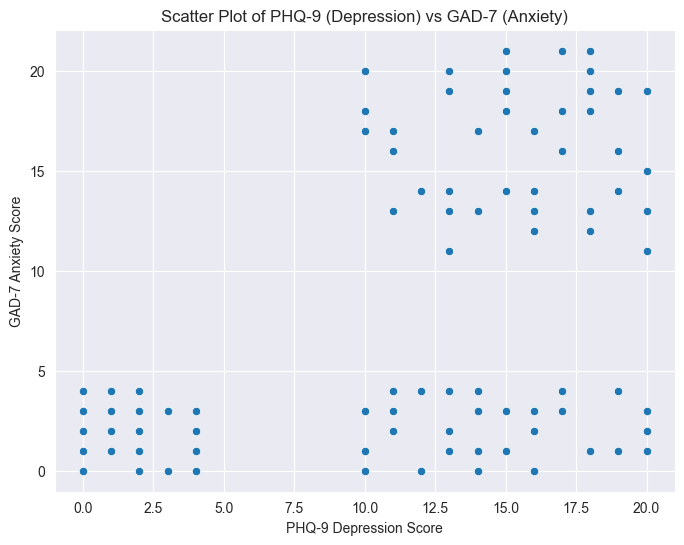

Spearman's coefficient: 0.367, p-value = 1.43e-5


In [83]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from decimal import Decimal

# Scatter plot to visualize the relationship between PHQ-9 and GAD-7
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['gad_tot'])
plt.title('Scatter Plot of PHQ-9 (Depression) vs GAD-7 (Anxiety)')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('GAD-7 Anxiety Score')
plt.grid(True)
plt.show()


# Since we've checked that our datat is not normal we use the spearman test
spearman_corr_gad, spearman_p_value = spearmanr(df_new['phq_tot'], df_new['gad_tot'])
print(f"Spearman's coefficient: {spearman_corr_gad:.3f}, p-value = {Decimal(spearman_p_value):.2e}")

The Spearman's coefficient of 0.387 suggests a moderate positive monotonic relationship between depression and anxiety. The p-value (1.77e-6) indicates that this correlation is statistically significant, with strong evidence against the null hypothesis of no relationship.

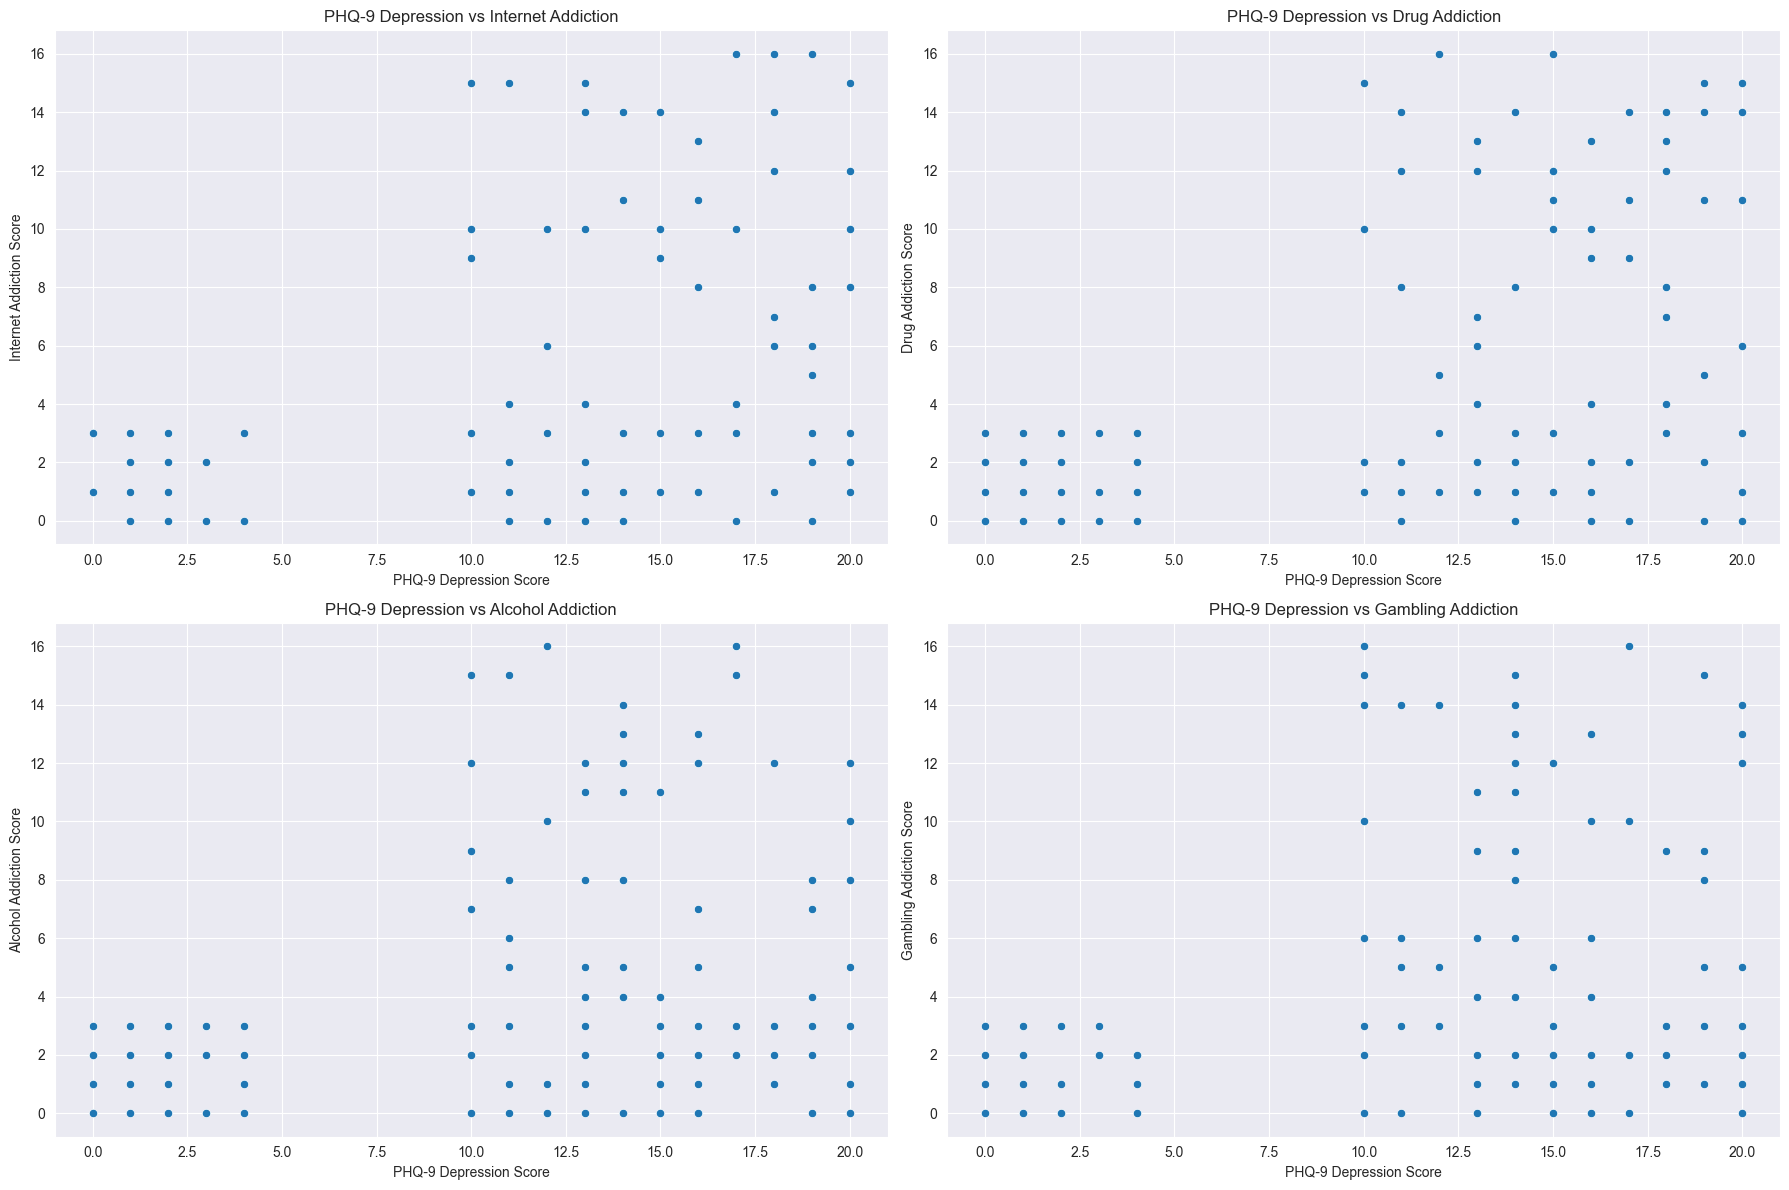

Gambling Addiction: Spearman Coefficient = 0.315, p-value = 2.18e-4


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from decimal import Decimal

# List of addictions and titles
addictions = ['ssba_internet_tot', 'ssba_drug_tot', 'ssba_alcohol_tot', 'ssba_gambling_tot']
addiction_titles = ['Internet Addiction', 'Drug Addiction', 'Alcohol Addiction', 'Gambling Addiction']

# Correlation results
correlation_results = {}

# Create scatter plots with PHQ-9 Depression on the x-axis
plt.figure(figsize=(18, 12))

for i, addiction in enumerate(addictions):
    # Scatter plot
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df_new['phq_tot'], y=df_new[addiction])
    plt.title(f'PHQ-9 Depression vs {addiction_titles[i]}')
    plt.xlabel('PHQ-9 Depression Score')
    plt.ylabel(f'{addiction_titles[i]} Score')
    
# Since we've checked that our datat is not normal we use the spearman test
spearman_corr, spearman_p_value = spearmanr(df_new['phq_tot'], df_new[addiction])
correlation_results[addiction_titles[i]] = {
    'Method': 'Spearman',
    'Coefficient': spearman_corr,
    'p-value': Decimal(spearman_p_value)
}

# Adjust layout for plots
plt.tight_layout()
plt.show()

# Print correlation results
for addiction, result in correlation_results.items():
    print(f"{addiction}: {result['Method']} Coefficient = {result['Coefficient']:.3f}, p-value = {result['p-value']:.2e}")

The results show statistically significant positive correlations between PHQ-9 (depression) and all types of addictions. Internet Addiction has the strongest correlation (Spearman's coefficient = 0.407, p-value = 3.03e-7), followed by Drug Addiction (0.385), Gambling Addiction (0.350), and Alcohol Addiction (0.307). These findings suggest that higher depression scores are moderately associated with higher addiction scores.

<h3>Multivariate Analysis<h3>

<Axes: >

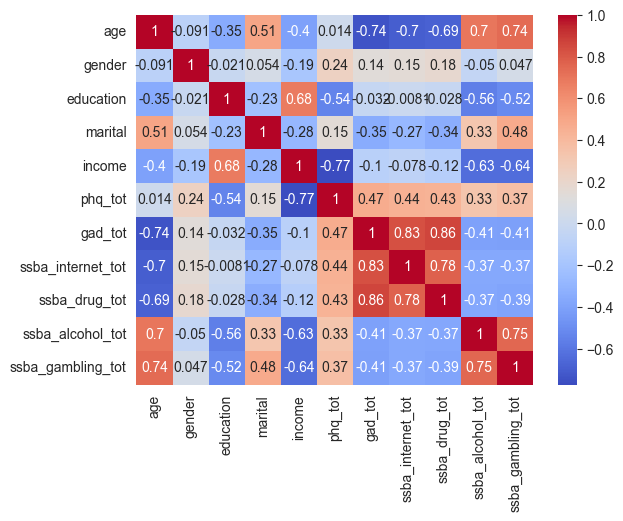

In [85]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

From the correlation heatmap, the following key insights can be deduced:

1.	Strong relationships between dependencies (SSBA_tot variables):
	There are strong correlations among ssba_internet_tot, ssba_drug_tot, ssba_alcohol_tot, and ssba_gambling_tot. This suggests that these dependencies might coexist.
	
2. PHQ-9 and GAD-7:
	phq_tot (depression) and gad_tot (anxiety) show a very strong positive correlation (0.84). This is expected, as depression and anxiety often coexist in psychological conditions.
3.	Relationships between PHQ-9, GAD-7, and dependencies:
	phq_tot and gad_tot have moderate correlations with dependencies. This suggests that higher levels of depression and anxiety may be associated with addictive behaviors.
4.	Age and dependencies:
	Age is negatively correlated with all dependencies. This indicates that younger individuals may be more prone to addictive behaviors, particularly related to internet use (-0.69) and gambling (-0.68).
5.	Education and dependencies:
	Education shows weak negative correlations with dependencies, suggesting that higher education levels might slightly reduce the risk of developing addictive behaviors.
6.	Economic and psychological relationships:
	Income is moderately positively correlated with education (0.68) and slightly negatively correlated with phq_tot (-0.3) and gad_tot (-0.3). This reflects that better economic conditions are slightly associated with lower levels of psychological symptoms.


<h2>DATA ANALYSIS<h2>

<h3>Data Preparation<h3>

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              150 non-null    int64  
 1   gender           148 non-null    float64
 2   education        150 non-null    int64  
 3   marital          149 non-null    float64
 4   income           149 non-null    float64
 5   phq_1            149 non-null    float64
 6   phq_2            150 non-null    int64  
 7   phq_3            150 non-null    int64  
 8   phq_4            150 non-null    int64  
 9   phq_5            150 non-null    int64  
 10  phq_6            148 non-null    float64
 11  phq_7            150 non-null    int64  
 12  phq_8            150 non-null    int64  
 13  phq_9            149 non-null    float64
 14  gad_1            150 non-null    int64  
 15  gad_2            150 non-null    int64  
 16  gad_3            150 non-null    int64  
 17  gad_4            150 

In [137]:
df_new_PCA = df.copy()

# I drop the rows which have null values in the columns that I need
df_new_PCA = df_new_PCA.dropna(subset=['gender', 'marital', 'income'])
df_new_PCA = df_new_PCA.dropna(subset=[f'phq_{i}' for i in range(1, 10)])
df_new_PCA = df_new_PCA.dropna(subset=[f'gad_{i}' for i in range(1, 8)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_internet_{i}' for i in range(1, 5)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_drug_{i}' for i in range(1, 5)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_alcohol_{i}' for i in range(1, 5)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_gambling_{i}' for i in range(1, 5)])

# I drop the columns that are useless for me
df_new_PCA = df_new_PCA.drop(columns=[f'asrs_{i}' for i in range(1, 7)])
df_new_PCA = df_new_PCA.drop(columns=[f'asq_{i}' for i in range(1, 51)])

# I sum up the columns of phq scores
df_new_PCA['phq_tot'] = df_new_PCA.loc[:, 'phq_1':'phq_9'].sum(axis=1)
df_new_PCA = df_new_PCA.drop(columns=[f'phq_{i}' for i in range(1, 10)])

# I sum up the columns of gad scores
df_new_PCA['gad_tot'] = df_new_PCA.loc[:, 'gad_1':'gad_7'].sum(axis=1)
df_new_PCA = df_new_PCA.drop(columns=[f'gad_{i}' for i in range(1, 8)])

# I sum up the columns of internet addiction
df_new_PCA['ssba_internet_tot'] = df_new_PCA.loc[:, 'ssba_internet_1':'ssba_internet_4'].sum(axis=1)
df_new_PCA = df_new_PCA.drop(columns=[f'ssba_internet_{i}' for i in range(1, 5)])

# I sum up the columns of drug addiction
df_new_PCA['ssba_drug_tot'] = df_new_PCA.loc[:, 'ssba_drug_1':'ssba_drug_4'].sum(axis=1)
df_new_PCA = df_new_PCA.drop(columns=[f'ssba_drug_{i}' for i in range(1, 5)])

# I sum up the columns of alcohol addiction
df_new_PCA['ssba_alcohol_tot'] = df_new_PCA.loc[:, 'ssba_alcohol_1':'ssba_alcohol_4'].sum(axis=1)
df_new_PCA = df_new_PCA.drop(columns=[f'ssba_alcohol_{i}' for i in range(1, 5)])

# I sum up the columns of gambling addiction
df_new_PCA['ssba_gambling_tot'] = df_new_PCA.loc[:, 'ssba_gambling_1':'ssba_gambling_4'].sum(axis=1)
df_new_PCA = df_new_PCA.drop(columns=[f'ssba_gambling_{i}' for i in range(1, 5)])

# The index must be from 0 to the maximum number of the actual dataset df_new_PCA
df_new_PCA.reset_index(drop=True, inplace=True)

df_new_PCA

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
128,52,1.0,13,1.0,44000.0,4.0,0.0,0.0,1.0,3.0,1.0
129,51,0.0,18,1.0,68000.0,1.0,4.0,0.0,0.0,1.0,1.0
130,32,1.0,13,0.0,38000.0,16.0,12.0,13.0,9.0,1.0,0.0
131,45,2.0,18,1.0,59000.0,4.0,1.0,3.0,3.0,1.0,2.0


<h3>One-Hot Encoding</h3>
One-hot encoding is a technique for representing categorical data as numerical vectors, where each unique category is represented by a binary column with a value of 1 indicating its presence and 0 indicating its absence.


https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial 

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html


I apply One-Hot Encoding only to the variables 'gender' and 'marital', as the variables related to 'education' are considered ordinal categorical variables.

In [138]:
df_new_PCA_one_hot = pd.get_dummies(df_new_PCA, columns=['gender', 'marital'], drop_first=False)
df_new_PCA_one_hot = df_new_PCA_one_hot.astype(float)
df_new_PCA_one_hot

,age,education,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot,gender_0.0,gender_1.0,gender_2.0,gender_3.0,marital_0.0,marital_1.0,marital_2.0,marital_3.0,marital_4.0,marital_5.0
0,18.0,13.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,62.0,5.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,31.0,13.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,76.0,8.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,19.0,8.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,52.0,13.0,44000.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
129,51.0,18.0,68000.0,1.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130,32.0,13.0,38000.0,16.0,12.0,13.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
131,45.0,18.0,59000.0,4.0,1.0,3.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<h3>Standardization</h3>

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy = False) # create an object StandardScaler (transformation will be applied to the original data)
scaler.fit(df_new_PCA_one_hot.astype(float))
#scaler.transform(df_new_PCA.astype(float))
df_scaled = pd.DataFrame(scaler.transform(df_new_PCA_one_hot.astype(float)))

<h3>PCA</h3>

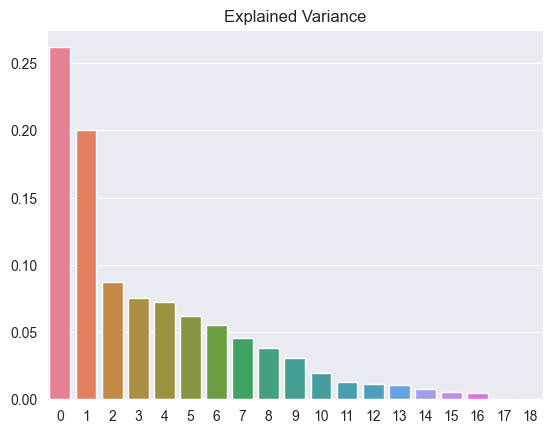

Number of components to retain 0.9% of the variance: 10


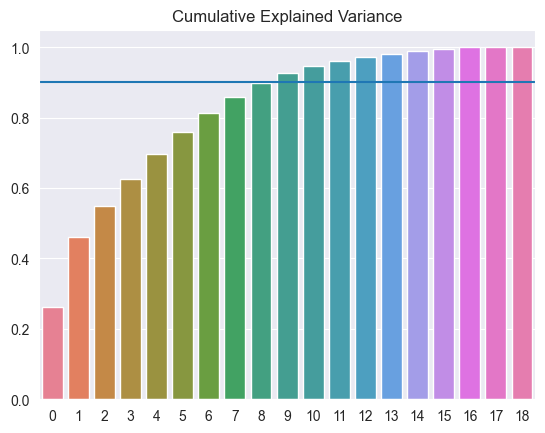

(133, 19)

In [140]:
from sklearn.decomposition import PCA
import seaborn as sns

# I apply PCA (from Machine Learning codes)
pca_1 = PCA()
pca_1.fit(df_scaled)
df_pca = pd.DataFrame(pca_1.transform(df_scaled))

# I analyze the explained variance (from Machine Learning codes)
explained_variance = pd.DataFrame(pca_1.explained_variance_ratio_).transpose()
ax = sns.barplot(data=explained_variance)
plt.title('Explained Variance')
plt.show()

# Cumulative explained variance
cum_explained_variance = np.cumsum(pca_1.explained_variance_ratio_)

threshold = 0.90

# I identify the number of components for the desired variance
n_components = np.argmax(cum_explained_variance >= threshold) + 1

print(f"Number of components to retain {threshold}% of the variance: {n_components}")

cum_explained_variance = pd.DataFrame(cum_explained_variance).transpose()
mx = sns.barplot(data=cum_explained_variance)
mx.axhline(threshold)
plt.title('Cumulative Explained Variance')
plt.show()

df_pca.shape

Now I select only the columns that retain the percentage of variance I have chosen to use

In [142]:
df_pca_reduced = df_pca.iloc[:,0:10]

<h3>CLUSTERING</h3>

<h4>Elbow method</h4>

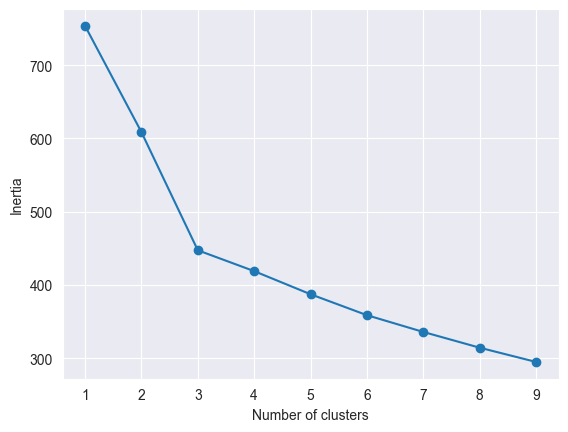

The optimal number of clusters with the Elbow method is: 2


In [143]:
from sklearn_extra.cluster import KMedoids

# Empty list to store distortion (inertia) values for each number of clusters
distortions = [] 

# Loop over the number of clusters, from 1 to 9
for i in range(1,10):
    
    # Set the maximum number of iterations to 0 for 1 or 2 clusters, otherwise to 300 (300 -> default value)
    max_iter = 0 if i <= 2 else 300
    km = KMedoids(n_clusters=i, metric='euclidean', method = 'pam', init = 'random', max_iter=max_iter, random_state = 123)
    
    # Fit the KMedoids model
    km.fit(df_pca_reduced)
    
    # Add the inertia to the distortion list
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Calculate the optimal number of clusters using the elbow method
second_derivatives = np.diff(distortions, 2)  # Second order difference
optimal_clusters = np.argmin(second_derivatives) + 2  # Add 2 to adjust for the second derivative index
print(f"The optimal number of clusters with the Elbow method is: {optimal_clusters}")    

<h4>Silhouette</h4>

The optimal number of clusters is: 3


Text(0, 0.5, 'Silhouette score')

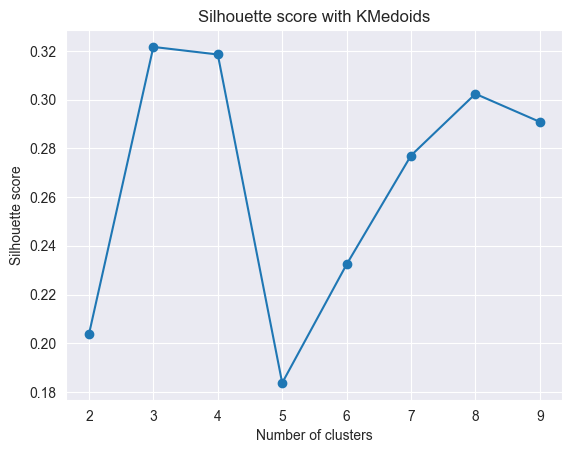

In [144]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2,10):
    km = KMedoids(n_clusters=i, metric='euclidean', init = 'random', max_iter=300, random_state = 123)
    y_km = km.fit_predict(df_pca_reduced)
    silhouette_scores.append(silhouette_score(df_pca_reduced, y_km))
    
# Find the number of clusters with the maximum silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts at 2

print(f"The optimal number of clusters is: {optimal_clusters}")
    
plt.plot(range(2,10), silhouette_scores, marker='o')
plt.title('Silhouette score with KMedoids')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [145]:
# Silhouette scores for 2 and 3 clusters
silhouette_scores = []

for i in range(2, 4): 
    km = KMedoids(n_clusters=i, metric='euclidean', init='random', max_iter=300, random_state=123)
    y_km = km.fit_predict(df_pca_reduced)
    silhouette_scores.append(silhouette_score(df_pca_reduced, y_km))

print(f"Silhouette score for 2 clusters: {silhouette_scores[0]:.4f}")
print(f"Silhouette score for 3 clusters: {silhouette_scores[1]:.4f}")

# I compute the absolute difference between the two scores
difference = abs(silhouette_scores[1] - silhouette_scores[0])
print(f"Difference between silhouette scores (2 vs 3 clusters): {difference:.4f}")

# I determine if the difference is minimal
# I define a threshold for the "minimal difference"
threshold = 0.05  
if difference < threshold:
    print("The difference is minimal; both models are almost equivalent in quality.")
else:
    print("The difference is significant; the models are not equivalent in quality.")

Silhouette score for 2 clusters: 0.2037
Silhouette score for 3 clusters: 0.3216
Difference between silhouette scores (2 vs 3 clusters): 0.1179
The difference is significant; the models are not equivalent in quality.


From the Elbow Method, I observe graphically that the optimal number of clusters is 3, but analytically it is 2. Therefore, I use the Silhouette Score to determine which number of clusters is more suitable. Based on the Silhouette Score, I find that the optimal number of clusters is 3.

To confirm, I calculate the Silhouette Scores for both 2 and 3 clusters. Then, I compute the absolute difference between the scores to check if the difference is minimal. If the difference is below a defined threshold (e.g., 0.05), the models are considered nearly equivalent in quality. Otherwise, the difference is significant, indicating that one model is superior. In this case, the difference is significant, confirming that 3 clusters provide a better clustering result.

<h4>KMedoids</h4>

I visualize the three clusters in 2 dimensions:

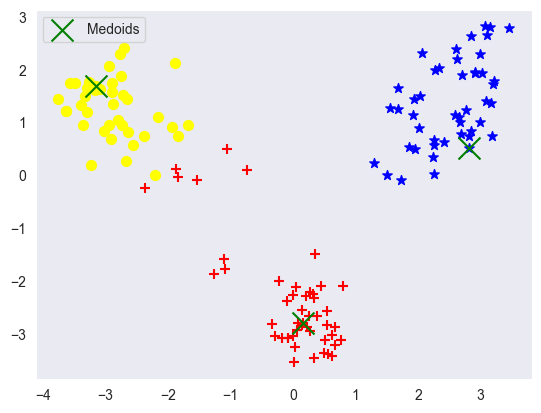

In [146]:
km = KMedoids(n_clusters = 3, metric = 'euclidean', method='pam', init = 'random', max_iter = 300, random_state = 123)

km.fit(df_pca_reduced)
y_km = km.predict(df_pca_reduced)

plt.scatter(df_pca_reduced.iloc[y_km == 0,0], 
            df_pca_reduced.iloc[y_km == 0,1], 
            s=50, c='yellow', marker='o')

plt.scatter(df_pca_reduced.iloc[y_km == 1,0], 
            df_pca_reduced.iloc[y_km == 1,1], 
            s=50, c='red', marker='+')

plt.scatter(df_pca_reduced.iloc[y_km == 2,0], 
            df_pca_reduced.iloc[y_km == 2,1], 
            s=50, c='blue', marker='*')

plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, c='green', marker='x', label='Medoids')

plt.legend()
plt.grid()
plt.show()

I visualize the three clusters in 3 dimensions:

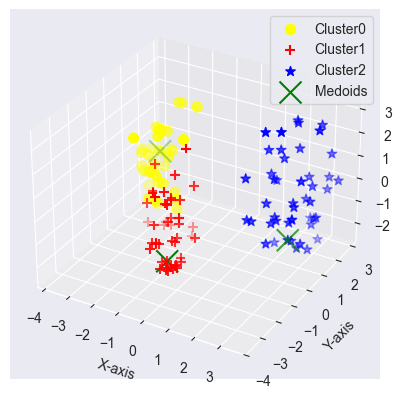

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_pca_reduced[y_km == 0].iloc[:, 0], 
    df_pca_reduced[y_km == 0].iloc[:, 1], 
    df_pca_reduced[y_km == 0].iloc[:, 2], 
    s=50, c='yellow', marker='o', label='Cluster0'
)

ax.scatter(
    df_pca_reduced[y_km == 1].iloc[:, 0], 
    df_pca_reduced[y_km == 1].iloc[:, 1], 
    df_pca_reduced[y_km == 1].iloc[:, 2], 
    s=50, c='red', marker='+', label='Cluster1'
)

ax.scatter(
    df_pca_reduced[y_km == 2].iloc[:, 0], 
    df_pca_reduced[y_km == 2].iloc[:, 1], 
    df_pca_reduced[y_km == 2].iloc[:, 2], 
    s=50, c='blue', marker='*', label='Cluster2'
)

ax.scatter(
    km.cluster_centers_[:, 0], 
    km.cluster_centers_[:, 1], 
    km.cluster_centers_[:, 2], 
    s=250, c='green', marker='x', label='Medoids'
)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')  # Corretto
ax.set_zlabel('Z-axis')  # Corretto

plt.legend()
plt.grid()
plt.show()


In [125]:
df_labeled = df_new_PCA
df_labeled['Cluster']=y_km
df_labeled

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot,Cluster
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0,0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0,2
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0,0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0,2
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,52,1.0,13,1.0,44000.0,4.0,0.0,0.0,1.0,3.0,1.0,1
129,51,0.0,18,1.0,68000.0,1.0,4.0,0.0,0.0,1.0,1.0,1
130,32,1.0,13,0.0,38000.0,16.0,12.0,13.0,9.0,1.0,0.0,0
131,45,2.0,18,1.0,59000.0,4.0,1.0,3.0,3.0,1.0,2.0,1


<h3>Statistical Analysis</h3>

Nominal variables:

In [126]:
n_cluster = 3
alpha_corrected = 0.05/n_cluster

In [98]:
#marital

contingency_table_marital = pd.crosstab(df_labeled['marital'], df_labeled['Cluster'])
contingency_table_marital

KeyError: 'marital'

In [134]:
from scipy.stats import chi2_contingency

p_values = []
p_index = 0

# Function to evaluate the p-value against a given alpha threshold
def different(p_value, alpha):
    if p_value < alpha:
        print(f'There are differences p_value: {p_value} < alpha: {alpha}\n')
    else:
        print(f'There are not differences p_value: {p_value} > alpha: {alpha}\n')

# Contingency table for the 'gender' variable vs the 'Cluster' variable
contingency_table_gender = pd.crosstab(df_labeled['gender'], df_labeled['Cluster'])
print(contingency_table_gender)

# Chi-squared test on the entire contingency table
chi2, p, _, expected, = chi2_contingency(contingency_table_gender)

# I must check if all expected frequencies are greater than or equal to 5
if (expected < 5).any():
    print("Some expected frequencies are LESS THAN 5. The chi-squared is not valid.\n")
else:
    print("All expected frequencies are >= 5. The chi-squared test is valid.\n")
    
p_values = p_values + [p] # add p-value to the list of p-values
print(f"\nchi: {chi2}, p : {p_values[p_index]}\n")
# I check if the result is significant
different(p_values[p_index], 0.05)

# I want to compare only Cluster 0 and Cluster 1
contingency_subtable_gender_0_1 = contingency_table_gender.iloc[:, [0, 1]]
print(contingency_subtable_gender_0_1)
p_index += 1
chi2, p, _, _, = chi2_contingency(contingency_subtable_gender_0_1)
p_values = p_values + [p]
print(f"\nchi: {chi2}, p : {p_values[p_index]}\n")

# I want to compare only Cluster 0 and Cluster 2
contingency_subtable_gender_0_2 = contingency_table_gender.iloc[:, [0, 2]]
print(contingency_subtable_gender_0_2)
p_index += 1
chi2, p, _, _, = chi2_contingency(contingency_subtable_gender_0_2)
p_values = p_values + [p]
print(f"\nchi: {chi2}, p : {p_values[p_index]}\n")

# I check if the result is significant for this comparison
different(p_values[p_index], alpha_corrected)

Cluster   0   1   2
gender             
0.0       4  19  13
1.0      13  14  10
2.0      10   6  13
3.0      14   6  11
All expected frequencies are >= 5. The chi-squared test is valid.

chi: 15.817997782120326, p : 0.014764910153231713

There are differences p_value: 0.014764910153231713 < alpha: 0.05
Cluster   0   1
gender         
0.0       4  19
1.0      13  14
2.0      10   6
3.0      14   6

chi: 13.863590764088, p : 0.0030968333542352013

Cluster   0   2
gender         
0.0       4  13
1.0      13  10
2.0      10  13
3.0      14  11

chi: 5.523902969910691, p : 0.13721592459968557

There are not differences p_value: 0.13721592459968557 > alpha: 0.016666666666666666


<h4>Numerical Variables</h4>

 *Kruskal-Wallis test* is used to compare the distributions of three or more independent groups. It is an extension of the *Mann-Whitney U test*, which is used to compare two groups. 

* kruskal(*samples, nan_policy='propagate', axis=0, keepdims=False)
    
  Compute the Kruskal-Wallis H-test for independent samples.
  
  The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.
  
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

* mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', *, nan_policy='propagate', keepdims=False)

    Perform the Mann-Whitney U rank test on two independent samples.

    The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.
  
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [135]:
import statistics
from scipy.stats import mannwhitneyu

ordinal = ['age', 'education', 'income', 'phq_tot', 'gad_tot', 'ssba_internet_tot', 'ssba_drug_tot', 'ssba_alcohol_tot', 'ssba_gambling_tot']

p_index = 0
p_values = []
n_cluster = 3
alpha_corrected = 0.05/n_cluster


def different(p_value, alpha):
    if p_value < alpha:
        print(f'There are differences p_value: {p_value} < alpha: {alpha}')
    else:
        print(f'There are not differences p_value: {p_value} > alpha: {alpha}')


for col in ordinal:
    print(f'\n{col}:')
    
    cluster_0 = df_labeled[df_labeled['Cluster'] == 0][col]
    value_0 = statistics.median(cluster_0)
    value_0 = round(value_0)
    q1_0 = np.percentile(cluster_0, 25)
    q3_0 = np.percentile(cluster_0, 75)
    print(f'Cluster 0 -> median: {value_0}, 1st percentile: {q1_0}, 3rd percentile: {q3_0}')
    
    cluster_1 = df_labeled[df_labeled['Cluster'] == 1][col]
    value_1 = statistics.median(cluster_1)
    value_1 = round(value_1)
    q1_1 = np.percentile(cluster_1, 25)
    q3_1 = np.percentile(cluster_1, 75)
    print(f'Cluster 1 -> median: {value_1}, 1st percentile: {q1_1}, 3rd percentile: {q3_1}')
    
    cluster_2 = df_labeled[df_labeled['Cluster'] == 2][col]
    value_2 = statistics.median(cluster_2)
    value_2 = round(value_2)
    q1_2 = np.percentile(cluster_2, 25)
    q3_2 = np.percentile(cluster_2, 75)
    print(f'Cluster 2 -> median: {value_2}, 1st percentile: {q1_2}, 3rd percentile: {q3_2}')
    
    # Kruskall-Wallis test
    
    print('\nKruskall Wallis: ')
    stat, p = kruskal([cluster_0], [cluster_1], [cluster_2], axis = 1)
    p_values = p_values + [p]
    different(p_values[p_index], 0.05)
    p_index = p_index + 1
    
    # Meann-Whitney U test
    
    #0-1
    print('\nMeann Whitney - cluster 0-1:  ')
    stat, p = mannwhitneyu(cluster_0, cluster_1)
    different(p, alpha_corrected)
    
    #0-2
    print('\nMeann Whitney - cluster 0-2:  ')
    stat, p = mannwhitneyu(cluster_0, cluster_2)
    different(p, alpha_corrected)
    
    #1-2
    print('\nMeann Whitney - cluster 1-2:  ')
    stat, p = mannwhitneyu(cluster_1, cluster_2)
    different(p, alpha_corrected)


age:
Cluster 0 -> median: 27, 1st percentile: 22.0, 3rd percentile: 31.0
Cluster 1 -> median: 44, 1st percentile: 38.0, 3rd percentile: 50.0
Cluster 2 -> median: 68, 1st percentile: 61.5, 3rd percentile: 75.0

Kruskall Wallis: 
There are differences p_value: [1.52522307e-25] < alpha: 0.05

Meann Whitney - cluster 0-1:  
There are differences p_value: 3.7491291937805134e-14 < alpha: 0.016666666666666666

Meann Whitney - cluster 0-2:  
There are differences p_value: 7.655553832253108e-16 < alpha: 0.016666666666666666

Meann Whitney - cluster 1-2:  
There are differences p_value: 2.0268950051932112e-16 < alpha: 0.016666666666666666

education:
Cluster 0 -> median: 13, 1st percentile: 8.0, 3rd percentile: 18.0
Cluster 1 -> median: 18, 1st percentile: 13.0, 3rd percentile: 22.0
Cluster 2 -> median: 8, 1st percentile: 5.0, 3rd percentile: 13.0

Kruskall Wallis: 
There are differences p_value: [2.65636796e-14] < alpha: 0.05

Meann Whitney - cluster 0-1:  
There are differences p_value: 4.879